<a href="https://colab.research.google.com/github/fikramikom/Belajar-Data-sciens/blob/main/Metode%20KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/KB/diabetes.csv',  sep=",")
print(df)
df.head()

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


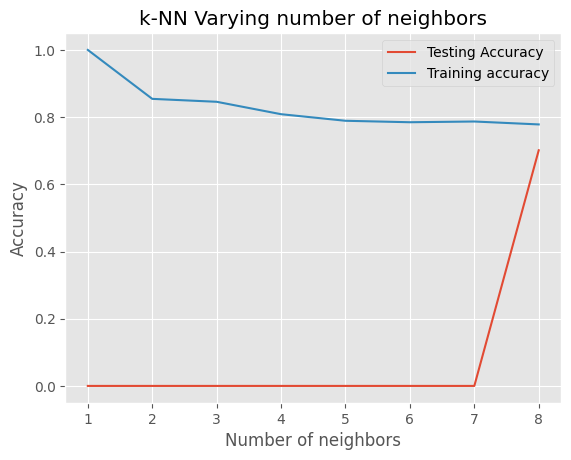

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       201
           1       0.62      0.56      0.59       107

    accuracy                           0.73       308
   macro avg       0.70      0.69      0.70       308
weighted avg       0.73      0.73      0.73       308



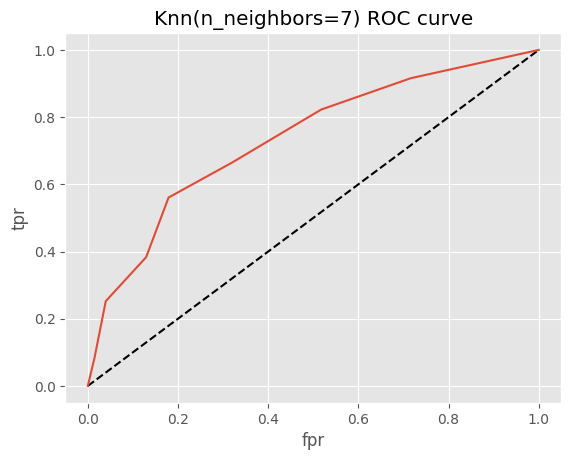

0.7345050448691124

In [3]:
#Print the first 5 rows of the dataframe.
df.head()

#Let's observe the shape of the dataframe.
df.shape

#Let's create numpy arrays for features and target
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

#importing train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)


#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):

 #Setup a knn classifier with k neighbors
 knn = KNeighborsClassifier(n_neighbors=k)

 #Fit the model
 knn.fit(X_train, y_train)

 #Compute accuracy on the training set
 train_accuracy[i] = knn.score(X_train, y_train)

 #Compute accuracy on the test set
test_accuracy[i] = knn.score(X_test, y_test)

#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

#Fit the model
knn.fit(X_train,y_train)

#Get accuracy. Note: In case of classification algorithms score method represe nts accuracy.
knn.score(X_test,y_test)

#import confusion_matrix
from sklearn.metrics import confusion_matrix

#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins
=True)

#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
y_pred_proba = knn.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

# Nama = Fikram Althaf Muyassar
# Nim = 20210410700019